# Récupération des données

In [1]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# le code qui suit n'est pas indispensable, il génère automatiquement un menu
# dans le notebook
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

Populating the interactive namespace from numpy and matplotlib


Ce notebook donne quelques exemples de codes qui permettent de récupérer les données utilisées par d'autres notebooks. Le module [actuariat_python](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/index.html) est implémenté avec Python 3. Pour les utilisateurs de Python 2.7, il suffira de recopier le code chaque fonction dans le notebook (suivre les liens insérés dans le notebook).

### Population française janvier 2015

Les données sont disponibles sur le site de l'INSEE [Pyramide des âges au 1er janvier 2015](http://www.insee.fr/fr/themes/tableau.asp?ref_id=ccc). Elles sont disponibles au format Excel avec le lien suivant : ``http://www.insee.fr/fr/ffc/figure/ccc.xls``. Le format n'est pas le plus simple car la première feuille inclut deux tables.

In [2]:
url = "http://www.insee.fr/fr/ffc/figure/ccc.xls"
import pandas
df=pandas.read_excel(url, sheetname=0)
df.head(n=3)

,Pyramide des âges au 1er janvier 2015,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Champ : France y compris Mayotte,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source : Insee, estimations de population (don...",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail(n=3)

,Pyramide des âges au 1er janvier 2015,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
108,1916,98,1882,8903,10785,NaN,-1882
109,1915,99,1629,7198,8827,NaN,-1629
110,1914 ou avant,100 ou plus,3756,20458,24214,NaN,-3756


La récupération de ces données est implémentée dans la fonction [population_france_2015](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/actuariat_python/data/population.html#actuariat_python.data.population.population_france_2015) :

In [1]:
from actuariat_python.data import population_france_2015
df = population_france_2015()

In [2]:
df.head(n=3)

,naissance,age,hommes,femmes,ensemble
10,2014,0,403837,386619,790456
11,2013,1,404502,386726,791228
12,2012,2,411217,393181,804398


In [3]:
df.tail(n=3)

,naissance,age,hommes,femmes,ensemble
108,1916,98,1882,8903,10785
109,1915,99,1629,7198,8827
110,1914,100,3756,20458,24214


D'après cette table, il y a plus de personnes âgées de 110 ans que de 109 ans. C'est dû au fait que la dernière ligne aggrège toutes les personnes âgées de plus de 110 ans.

### Table de mortalité 2000-2002 (France)

On utilise quelques raccourcis afin d'éviter d'y passer trop de temps. Les données sont fournis au format Excel à l'adresse : http://www.institutdesactuaires.com/gene/main.php?base=314. La fonction [table_mortalite_france_00_02](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/actuariat_python/data/population.html#actuariat_python.data.population.table_mortalite_france_00_02) permet de les récupérer.

In [1]:
from actuariat_python.data import table_mortalite_france_00_02
df=table_mortalite_france_00_02()
df.head()

,Age,Homme,Femme
0,0,100000,100000
1,1,99511,99616
2,2,99473,99583
3,3,99446,99562
4,4,99424,99545


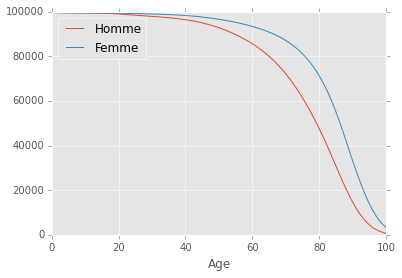

In [6]:
df.plot(x="Age",y=["Homme", "Femme"],xlim=[0,100])

### Taux de fécondité (France)

On procède de même pour cette table avec la fonction [fecondite_france](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/actuariat_python/data/population.html#actuariat_python.data.population.fecondite_france). Source : [INSEE : Fécondité selon l'âge détaillé de la mère](http://www.insee.fr/fr/themes/tableau.asp?reg_id=0&ref_id=bilandemo2).

In [2]:
from actuariat_python.data import fecondite_france
df=fecondite_france()
df.head()

,age,2004,2014
3,15,0.7,0.8
4,16,2.5,2.3
5,17,6.0,5.2
6,18,12.0,9.9
7,19,22.5,18.6


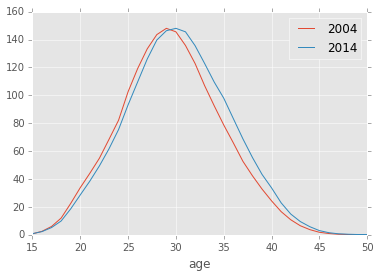

In [3]:
df.plot(x="age", y=["2004","2014"])

### Table de mortalité étendue 1960-2010

[table de mortalité de 1960 à 2010](http://www.data-publica.com/opendata/7098--population-et-conditions-sociales-table-de-mortalite-de-1960-a-2010) qu'on récupère à l'aide de la fonction [table_mortalite_euro_stat](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/actuariat_python/data/population.html#actuariat_python.data.population.table_mortalite_euro_stat).

In [2]:
from actuariat_python.data import table_mortalite_euro_stat 
table_mortalite_euro_stat()

    downloading of  http://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/demo_mlifetable.tsv.gz  to  demo_mlifetable.tsv.gz


'mortalite.txt'

In [3]:
import os
os.stat("mortalite.txt")

os.stat_result(st_mode=33206, st_ino=15762598696434557, st_dev=2797837379, st_nlink=1, st_uid=0, st_gid=0, st_size=104871002, st_atime=1442048416, st_mtime=1442048461, st_ctime=1442048416)

In [4]:
import pandas
df = pandas.read_csv("mortalite.txt", sep="\t", encoding="utf8", low_memory=False)
df.head()

,annee,valeur,age,age_num,indicateur,genre,pays
0,2009,0.00080,Y01,1,DEATHRATE,F,AM
1,2008,0.00067,Y01,1,DEATHRATE,F,AM
2,2007,0.00052,Y01,1,DEATHRATE,F,AM
3,2006,0.00123,Y01,1,DEATHRATE,F,AM
4,2013,0.00016,Y01,1,DEATHRATE,F,AT


In [5]:
df [ ((df.age=="Y60") | (df.age=="Y61")) & (df.annee == 2000) & (df.pays=="FR") & (df.genre=="F")]

,annee,valeur,age,age_num,indicateur,genre,pays
86725,2000,0.00502,Y60,60,DEATHRATE,F,FR
88262,2000,0.00486,Y61,61,DEATHRATE,F,FR
481629,2000,25.80000,Y60,60,LIFEXP,F,FR
483151,2000,24.90000,Y61,61,LIFEXP,F,FR
874543,2000,0.00501,Y60,60,PROBDEATH,F,FR
876080,2000,0.00485,Y61,61,PROBDEATH,F,FR
1270123,2000,0.99499,Y60,60,PROBSURV,F,FR
1271660,2000,0.99515,Y61,61,PROBSURV,F,FR
1664949,2000,93076.00000,Y60,60,PYLIVED,F,FR
1666471,2000,92618.00000,Y61,61,PYLIVED,F,FR
